In [7]:
# imports
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# inline plotting
%matplotlib inline
%config InlineBackend.figure_format='svg'

# style
sns.set_style('darkgrid')

In [8]:
# for creating a smart progress meter
from tqdm import tqdm

# machine learning classifiers and metrics
from sklearn.cluster import KMeans, DBSCAN # dbscan - density-based spatial clustering of application with noise
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

from ipywidgets import interactive # creates user interface

from collections import defaultdict # creates any items that you try to access

import hdbscan  # Hierarchical Density-Based Spatial Clustering of Applications with Noise
import folium   # for data visualization in the map
import re

colors = ['#e6194b','#3cb44b','#ffe119','#4363d8','#f58231','#911eb4','#46f0f0','#f032e6','#bcf60c','#fabebe','#008080',
          '#e6beff','#9a6324','#fffac8','#800000','#aaffc3','#808000','#ffd8b1','#000075','#808080']*10


In [9]:
# reading dataset
df = pd.read_csv('taxi_data.csv')
df.head()

LON       LAT                          NAME
0  28.17858 -25.73882         11th Street Taxi Rank
1  28.17660 -25.73795    81 Bazaar Street Taxi Rank
2  27.83239 -26.53722          Adams Road Taxi Rank
3  28.12514 -26.26666  Alberton City Mall Taxi Rank
4  28.10144 -26.10567      Alexandra Main Taxi Rank

In [10]:
# checking for duplicates
df.duplicated(subset=['LON','LAT']).values.any()

True

In [11]:
# checking for NaN's
df.isnull().values.any()

True

In [12]:
# dropping duplicates and NaN's

print(f'Shape of the data before dropping NaN and duplicates {df.shape}')

df.dropna(inplace=True)
df.drop_duplicates(subset=['LON','LAT'], keep='first', inplace=True)

print(f'Shape of the data after dropping NaN and duplicates {df.shape}')

Shape of the data before dropping NaN and duplicates (838, 3)
Shape of the data after dropping NaN and duplicates (823, 3)


In [13]:
# putting LON and LAT into array
X = np.array(df[['LON','LAT']], dtype='float64')

<AxesSubplot:>

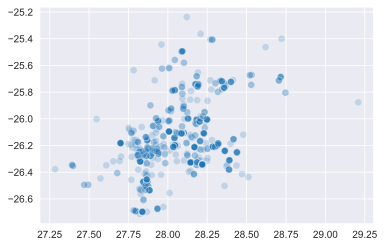

In [14]:
# scatterplot hte coordinates
sns.scatterplot(x=X[:,0], y=X[:,1], alpha=0.2, s=50)

In [15]:
# creating a map object with folium
m = folium.Map(location=[df['LAT'].mean(),df['LON'].mean()], zoom_start=9, tiles='Stamen Toner')
m

In [16]:
# putting our coordinates on the map

for _, row in df.iterrows():                                          # iterating through each row in dataframe
    
    folium.CircleMarker(location=[row['LAT'], row['LON']],            # coordinates of the points (circles)
                       radius=5,                                      # size of the circles
                       popup=re.sub(r'[^a-zA-Z ]+', '', row['NAME']), # circle's popups (only charachters and spaces)
                       color='#1787FE',                               # color of the circles
                       fill=True,                                     # filling of the circles
                       fill_color='#1787FE'                           # color of the filling
                       ).add_to(m)                                    # added to previously created map

In [17]:
m

In [18]:
# creating dummy data to check accuracy metric later
X_blobs, _ = make_blobs(n_samples=1000, centers=10, n_features=2, cluster_std=0.5, random_state=4)

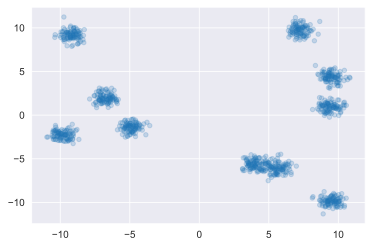

In [19]:
# plot dummy data
plt.scatter(x=X_blobs[:,0], y=X_blobs[:,1], alpha=0.2, s=20)

In [20]:
# prepared data with cluster predictions
class_predictions = np.load('sample_clusters.npy')
class_predictions

array([2, 2, 2, 2, 1, 0, 1, 0, 2, 1, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0,
       2, 0, 2, 1, 2, 0, 0, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 2, 2,
       2, 1, 2, 1, 0, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 0,
       2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 2, 2,
       1, 2, 2, 0, 2, 1, 2, 2, 1, 0, 2, 2, 2, 0, 1, 0, 1, 2, 0, 0, 2, 2,
       0, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 1, 1, 2, 1, 2, 0, 0,
       2, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 0, 2,
       2, 0, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 0, 2, 2, 2, 0, 2,
       1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 1, 1, 2, 2, 0, 2, 0,
       2, 1, 0, 2, 0, 2, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 1, 0, 2, 1,
       1, 2, 0, 2, 0, 2, 2, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 0, 1, 0, 2, 2,
       1, 0, 2, 1, 0, 0, 2, 1, 2, 1, 0, 0, 2, 2, 2, 0, 1, 0, 1, 0, 2, 1,
       0, 1, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0,

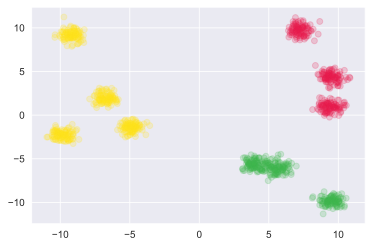

In [21]:
#plot those prepared cluster predictions over dummy data
unique_clusters = np.unique(class_predictions)
for unique_cluster in unique_clusters:
    x = X_blobs[class_predictions==unique_cluster]
    plt.scatter(x=x[:,0],y=x[:,1], alpha=0.2, c=colors[unique_cluster])

In [22]:
# check how good those cluster predictions were using metrics
silhouette_score(X_blobs, class_predictions)

0.6657220862867241

In [23]:
# improved cluster predictions
class_predictions_improved = np.load('sample_clusters_improved.npy')
silhouette_score(X_blobs, class_predictions_improved)

0.7473587799908298

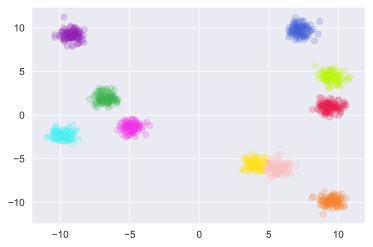

In [24]:
unique_clusters = np.unique(class_predictions_improved)
for unique_cluster in unique_clusters:
    x = X_blobs[class_predictions_improved==unique_cluster]
    plt.scatter(x=x[:,0],y=x[:,1], alpha=0.2, c=colors[unique_cluster])

K-Means Clustering

In [25]:
# dummy data
X_blobs, _ = make_blobs(n_samples=1000, centers=50, n_features=2, cluster_std=1, random_state=4)

In [26]:
# creating dictionary iterating through K-Means
data = defaultdict(dict)

for x in range(1,21):
    model = KMeans(n_clusters=3, random_state=17, max_iter=x, n_init=1).fit(X_blobs)
    
    data[x]['class_predictions'] = model.predict(X_blobs)
    data[x]['centroids'] = model.cluster_centers_
    data[x]['unique_classes'] = np.unique(class_predictions)

In [27]:
# a function that will scatterplot dummy data
def f(x):
    
    class_predictions = data[x]['class_predictions']
    centroids = data[x]['centroids']
    unique_classes = data[x]['unique_classes']
    
    for unique_class in unique_classes:
        plt.scatter(X_blobs[class_predictions==unique_class][:,0],
                    X_blobs[class_predictions==unique_class][:,1],
                    alpha=0.3, c=colors[unique_class])
        
    plt.scatter(centroids[:,0],centroids[:,1], s=200, c='#000000', marker='v')
    plt.ylim([-15,15])
    plt.xlim([-15,15])
    plt.title('How K-Means Cluster works')
    
# interactive plot to see how K-Means works / change X on the bar to see how clusters change 
interactive_plot = interactive(f, x=(1,20))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=10, description='x', max=20, min=1), Output(layout=Layout(height='350px'…

In [29]:
# we will take k=70 as it shows in the practice project
k=70
model = KMeans(n_clusters=k, random_state=17).fit(X)
predictions = model.predict(X)
df[f'CLUSTER_kmeans{k}'] = predictions

In [30]:
# creating a function that will print a map with clusters on it
def create_map(df, cluster_column):
    
    m = folium.Map(location=[df['LAT'].mean(),df['LON'].mean()], zoom_start=9, tiles='Stamen Toner')
    
    
    for _, row in df.iterrows():                                          # iterating through each row in dataframe
        
        
        if row[cluster_column] == -1:                                     # paint outlier black
            cluster_color = '#000000'
        else:    
            cluster_color = colors[row[cluster_column]]
    
        folium.CircleMarker(location=[row['LAT'], row['LON']],            # coordinates of the points (circles)
                           radius=5,                                      # size of the circles
                           popup=row[cluster_column],                     # circle's popups (only charachters and spaces)
                           color=cluster_color,                           # color of the circles
                           fill=True,                                     # filling of the circles
                           fill_color=cluster_color                       # color of the filling
                           ).add_to(m)                                    # added to previously created map
    return m

print(f'K = {k}')
print(f'Silhouette score: {silhouette_score(X, predictions)}')

K = 70
Silhouette score: 0.6367300948961482


In [31]:
create_map(df, 'CLUSTER_kmeans70')

In [32]:
# let's find which k will give best silhouette score
best_silhouette, best_k = -1, 0

for k in tqdm(range(2,100)):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    class_predictions = kmeans.predict(X)
    
    curr_silh = silhouette_score(X, class_predictions)
    
    if curr_silh > best_silhouette:
        best_k = k
        best_silhouette = curr_silh
        
        
print(f'Best k = {best_k}')
print(f'Silhouette score of the best k = {best_silhouette}')

100%|██████████████████████████████████████████████████████████████████████████████████| 98/98 [01:06<00:00,  1.46it/s]

Best k = 98
Silhouette score of the best k = 0.6971995093340411


In [33]:
# code for indexing out certain values
dummy = np.array([-1,-1,-1,2,3,4,5])

# let's create a new array where -1 (the outliers) are given new values making them singltone clusters
new = np.array([(index+2)*value if value==-1 else value for index, value in enumerate(dummy)])
new

array([-2, -3, -4,  2,  3,  4,  5])

In [34]:
# let's train our dbscan model now
dbscan = DBSCAN(eps=0.01, min_samples=5).fit(X)  # eps-radius to search around, min_samples - min data points to consider in cluster
predictions = dbscan.labels_

# add those predictions to our dataframe
df['CLUSTER_DBSCAN'] = predictions

In [35]:
# let's visualize our result
create_map(df,'CLUSTER_DBSCAN')

In [36]:
print(f"Number of clusters found {len(np.unique(predictions))}")
print(f"Number of outliers found {df[df['CLUSTER_DBSCAN']==-1]['CLUSTER_DBSCAN'].count()}")
print(f'Silhouette score without outliers {silhouette_score(X[predictions!=-1], predictions[predictions!=-1])}')
no_outliers = np.array([(index+2)*value if value==-1 else value for index,value in enumerate(predictions)])
print(f'Silhouette score with outliers {silhouette_score(X,no_outliers)}')

Number of clusters found 51
Number of outliers found 289
Silhouette score without outliers 0.9232138250288208
Silhouette score with outliers 0.5667489350583482


In [37]:
import hdbscan

In [38]:
# let's try HDBSCAN
model = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=2, cluster_selection_epsilon=0.01).fit(X)
predictions = model.labels_

In [39]:
df['CLUSTER_HDBSCAN'] = predictions
create_map(df,'CLUSTER_HDBSCAN')

In [40]:
print(f"Number of clusters found {len(np.unique(predictions))-1}")
print(f"Number of outliers found {len(predictions[predictions==-1])}")
print(f'Silhouette score without outliers {silhouette_score(X[predictions!=-1], predictions[predictions!=-1])}')
no_outliers = np.array([(index+2)*value if value==-1 else value for index,value in enumerate(predictions)])
print(f'Silhouette score with outliers {silhouette_score(X,no_outliers)}')

Number of clusters found 66
Number of outliers found 102
Silhouette score without outliers 0.7670504356844786
Silhouette score with outliers 0.638992483305273


In [41]:
# dealing with outliers using K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=1)

In [42]:
# we need train and predict sets. All data with CLUSTER_HDBSCAN=-1 would be predict data, rest - train
train = df[df['CLUSTER_HDBSCAN']!=-1]
predict = df[df['CLUSTER_HDBSCAN']==-1]

In [43]:
X_train = np.array(train[['LON','LAT']], dtype='float64')
y_train = np.array(train['CLUSTER_HDBSCAN'])

X_predict = np.array(predict[['LON','LAT']], dtype='float64')

In [44]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [45]:
predictions = knn.predict(X_predict)

In [46]:
predictions

array([26, 41, 13, 44, 57, 26, 34,  4, 60, 60, 16, 16, 61, 24, 51, 51, 51,
       58, 41, 63, 13, 45, 15, 45, 45,  6,  0, 17, 26, 26, 26, 49, 49, 53,
       49, 13, 61, 26, 26, 39, 65, 31, 31, 31,  0, 46, 46, 21, 58, 60,  6,
        5, 24,  1, 63, 34, 64, 36, 36, 16,  7,  3, 64, 41, 13, 39, 39, 39,
       41, 40, 40, 25, 59, 57, 61, 61, 62, 26, 15, 15, 59, 63,  6, 19, 61,
       61, 48,  4, 41, 21, 64, 64, 64, 61, 61, 21, 23, 38, 31, 41, 55, 55],
      dtype=int64)

In [47]:
df['CLUSTER_HYBRID'] = df['CLUSTER_HDBSCAN']

In [48]:
df.loc[df['CLUSTER_HDBSCAN']==-1, 'CLUSTER_HYBRID'] = predictions

In [49]:
create_map(df,'CLUSTER_HYBRID')

In [50]:
predictions = df['CLUSTER_HYBRID']
print(f"Number of clusters found {len(np.unique(predictions))}")
print(f"Silhouette score {silhouette_score(X,predictions)}")

Number of clusters found 66
Silhouette score 0.5849126494706486


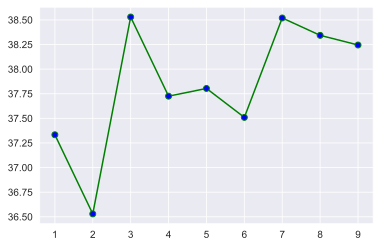

In [51]:
# let's try elbow method to find better k for KNN

#creating a loop to find out what k is better
err_rate = []       #initializing an empty list to get an error list
for i in range(1,10):  #range for our k from 1 to 30 
    knn = KNeighborsClassifier(n_neighbors = i) #creating an instance for KNneighborsClassifier
    knn.fit(X_train, y_train)                   #training the model
    pred_i = knn.predict(X_predict)                #getting predictions
    err_rate.append(np.mean(pred_i)) #err_rate is avg of predictions in pred_i and y_test if both aren't equal, if 
                                               # they're equal ther is no error
        
#plotting list of errors
plt.plot(range(1,10), err_rate, color = 'green', marker = 'o', markerfacecolor = 'blue')        

In [52]:
# let's try k=2
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
predictions = knn.predict(X_predict)

df['CLUSTER_HYBRID_k2'] = df['CLUSTER_HDBSCAN']
df.loc[df['CLUSTER_HDBSCAN']==-1, 'CLUSTER_HYBRID_k2'] = predictions



predictions = df['CLUSTER_HYBRID_k2']
print(f"Number of clusters found {len(np.unique(predictions))}")
print(f"Silhouette score {silhouette_score(X,predictions)}")

Number of clusters found 66
Silhouette score 0.5797532099356233


In [53]:
create_map(df,'CLUSTER_HYBRID_k2')

In [125]:
# k=2 gave a worse silhouette score than k=1

Text(0.5, 0, 'Cluster size')

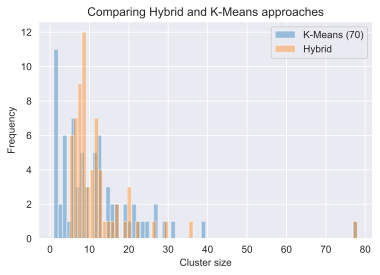

In [54]:
df['CLUSTER_kmeans70'].value_counts().plot.hist(bins=70, alpha=0.4, label='K-Means (70)')
df['CLUSTER_HYBRID'].value_counts().plot.hist(bins=70, alpha=0.4, label='Hybrid')
plt.legend()
plt.title('Comparing Hybrid and K-Means approaches')
plt.xlabel('Cluster size')

In [55]:
# The project showed how K-Means clustering and HDBSCAN can be used on geolocational data